{ 011:458 101:542 }



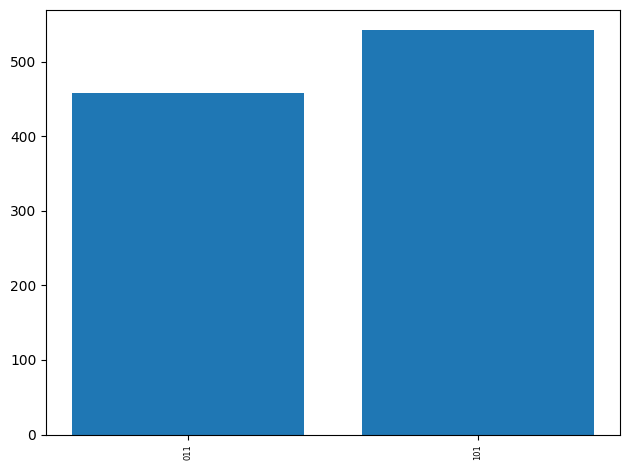

In [ ]:
import cudaq
from typing import Callable
import matplotlib.pyplot as plt

n_qubits = 3 
M = 1 # number of iterations

@cudaq.kernel
def reflect(qubits: cudaq.qview):
    ctrls = qubits.front(qubits.size() - 1)
    last = qubits.back()
    cudaq.compute_action(lambda: (h(qubits), x(qubits)),
                          lambda: z.ctrl(ctrls, last))

@cudaq.kernel
def oracle(q: cudaq.qview):
    z.ctrl(q[0], q[2])
    z.ctrl(q[1], q[2])

@cudaq.kernel
def grover(N: int, M: int, oracle: Callable[[cudaq.qview], None]):
    q = cudaq.qvector(N)
    h(q)
    for i in range(M):
        oracle(q)
        reflect(q)
    mz(q)
    
counts = cudaq.sample(grover, n_qubits, M, oracle, shots_count=10**3)

print(counts)

sorted_counts = dict(sorted(counts.items()))
bitstrings = list(sorted_counts.keys())
frequencies = list(sorted_counts.values())
plt.bar(range(len(bitstrings)), frequencies)
plt.xticks(range(len(bitstrings)), bitstrings, rotation='vertical', fontsize=6)
plt.tight_layout()
plt.show()
